In [1]:
# Imports
import pandas as pd
import seaborn as sns
import json

In [2]:
# Data file import
path = "../data/"
data = []
with open(path + '202106_movements.json', 'r',encoding='latin-1') as f:
    for line in f: 
        a = json.loads(line)               
        a['_id'] = a['_id']['$oid']       
        data.append(a)

In [3]:
# Data sample
df = pd.DataFrame(data)
df.head()

,_id,user_day_code,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,ageRange,idplug_station,unplug_hourTime,zip_code
0,60bbf3f21b91311d90d568ad,b67ea824acf706087d5818ebc6f90821a5abaab17a0868...,15,1,13,319,38,0,54,2021-06-01T00:00:00Z,
1,60bbf3f21b91311d90d568b2,364b1b99f1f9a1748f7abf1134c8d6a46197b583649308...,7,1,1,386,185,0,126,2021-06-01T00:00:00Z,
2,60bbf3f21b91311d90d568b3,5cc17031cba02835dda4b6c153b56572beaade54d8ab91...,14,1,10,465,15,0,91,2021-06-01T00:00:00Z,
3,60bbf3f21b91311d90d568b4,6e855acaaa17d6d14236598c0f1172c783e16950e39c01...,8,1,22,613,84,0,236,2021-06-01T00:00:00Z,
4,60bbf3f21b91311d90d568b5,e93417502d55208995a61f4177956ab9289aba39044ce3...,1,1,4,751,131,5,94,2021-06-01T00:00:00Z,28006


# Exercise 5 (2pts)
Using seaborn create a graph showing a point for each journey on day 15:
*   The x-axis will be the start time of the trip (0-23)
*   The y-axis will be the length of the journey
*   For the marker style the user type will be used
*   The size of the bookmark will correspond to the age range of the user

Note: Since there are only 24 possible values for the time, points will accumulate on them. It will be valued to find a solution that improves the visualization.<br>(Possible functions: catplot, stripplot, swarmplot)

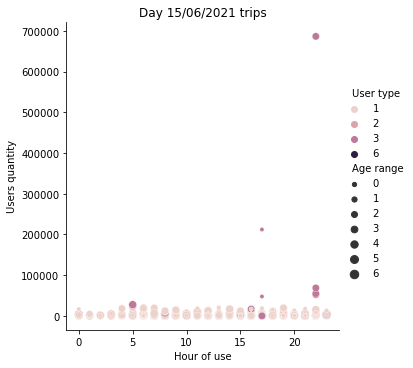

In [4]:
# I collect in another column called unplug_day the day, and in unplug_hour the hour
df['unplug_day'] = df['unplug_hourTime'].str[:10]
df['unplug_hour'] = df['unplug_hourTime'].str[11:13].astype(int)

# And I save the trips that were made on the 15th in a new dataframe
fifteen = df.query("unplug_day == '2021-06-15'")

sns.relplot(
    data = fifteen.rename(columns={"user_type": "User type", "ageRange": "Age range"}),
    x = "unplug_hour", y = "travel_time", hue = "User type", size = "Age range").set(title='Day 15/06/2021 trips', xlabel = 'Hour of use', ylabel = 'Users quantity')

# Exercise 6 (2pts)
Using seaborn, create a graph to display the number of users of each type by day of the week.<br>
(Possible functions: catplot, bar_plot, count_plot)

In [5]:
# I create a new column called datetime that has the same value as unplug_hourTime but of type datetime
df['datetime'] = pd.to_datetime(df['unplug_hourTime'])

# I create another column called weekday that has the name of the week based on the weekday() value of the Datetime column
weekday = []
for field, row in df.iterrows():
  if(row.datetime.weekday() == 0):
    weekday.append('Monday')
  if(row.datetime.weekday() == 1):
    weekday.append('Tuesday')
  if(row.datetime.weekday() == 2):
    weekday.append('Wednesday')
  if(row.datetime.weekday() == 3):
    weekday.append('Thursday')
  if(row.datetime.weekday() == 4):
    weekday.append('Friday')
  if(row.datetime.weekday() == 5):
    weekday.append('Saturday')
  if(row.datetime.weekday() == 6):
    weekday.append('Sunday')
df['weekday']=weekday

[Text(0.5, 1.0, 'Users by type and day of the week'),
 Text(0.5, 0, 'Users quantity'),
 Text(0, 0.5, 'Weekday')]

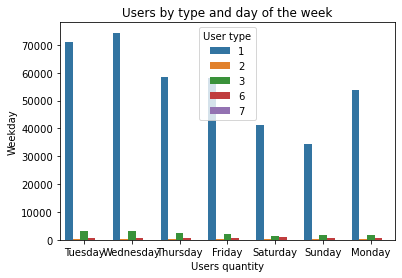

In [6]:
sns.countplot(data = df.rename(columns={"user_type": "User type"}),
              x = "weekday", hue = "User type").set(title = 'Users by type and day of the week', xlabel = 'Users quantity', ylabel = 'Weekday')